# Descargar datos de Kaggle

In [1]:
!kaggle datasets download -d andrewmvd/fetal-health-classification
!unzip fetal-health-classification.zip

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification
License(s): other
  0% 0.00/45.8k [00:00<?, ?B/s]
100% 45.8k/45.8k [00:00<00:00, 2.56MB/s]
Archive:  fetal-health-classification.zip
  inflating: fetal_health.csv        


In [15]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.4 MB/s eta 0:00:00


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import umap

std_figure_size = (8,5)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

# Importar Datos

**Reading in the dataset**

**Data**

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

**Normal**

**Suspect**

**Pathological**

In [4]:
df = pd.read_csv("/content/fetal_health.csv")


df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# Datos duplicados

In [5]:
n_dup = len(df) - len(df.drop_duplicates())

print(f"Number of duplicate rows: {n_dup}")

Number of duplicate rows: 13


## Validar si hay vacios

In [6]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [31]:

# Verifica las etiquetas únicas
unique_labels = np.unique(df["fetal_health"])
print(f"Unique labels before recoding: {unique_labels}")

# Mapea las etiquetas originales a nuevas etiquetas consecutivas
label_mapping = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}
print(f"Label mapping: {label_mapping}")

Unique labels before recoding: [1. 2. 3.]
Label mapping: {1.0: 0, 2.0: 1, 3.0: 2}


In [32]:
df['fetal_health'] = df['fetal_health'].map(label_mapping)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,1
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0


## Limpiar los nombres de las columnas del dataset

In [33]:
cols_cleaned = []

for col in df.columns:
    cols_cleaned.append(col.strip().lower())

df.columns = cols_cleaned

# sanity check
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,1
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0


## Graficar distribuciones

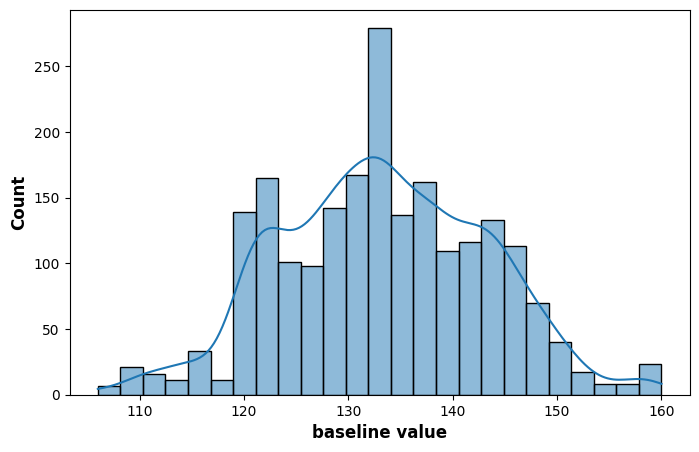

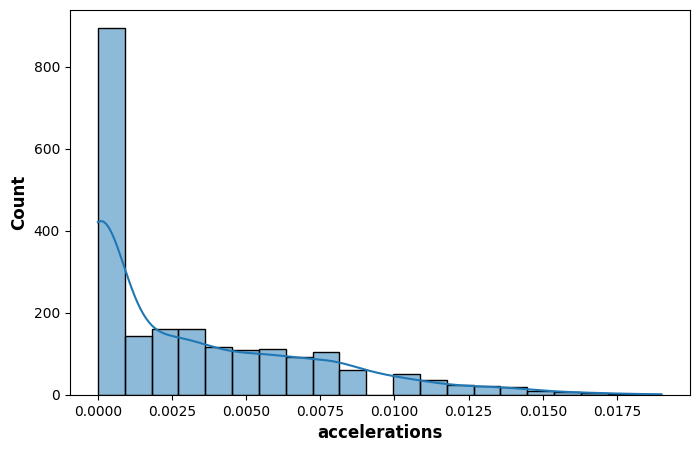

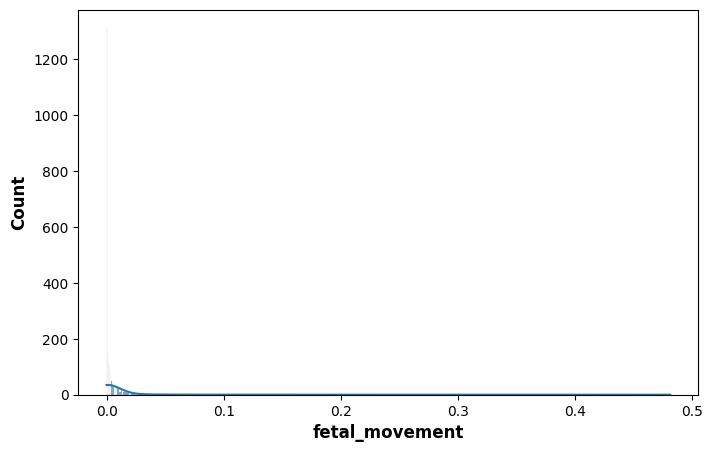

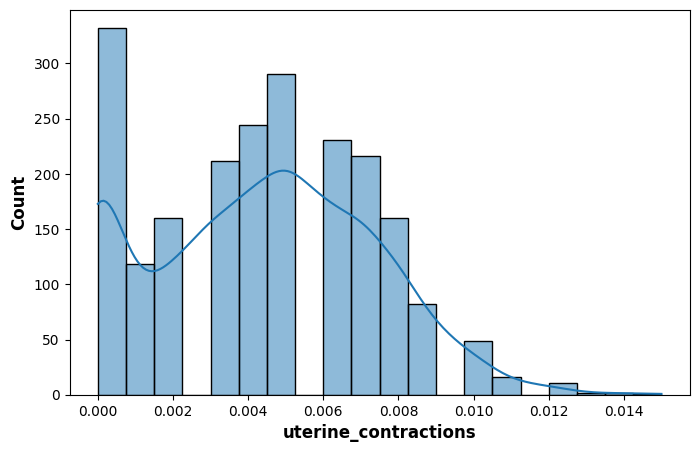

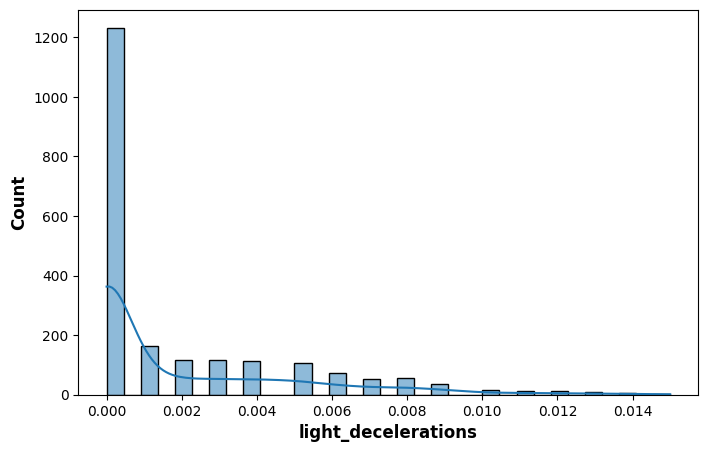

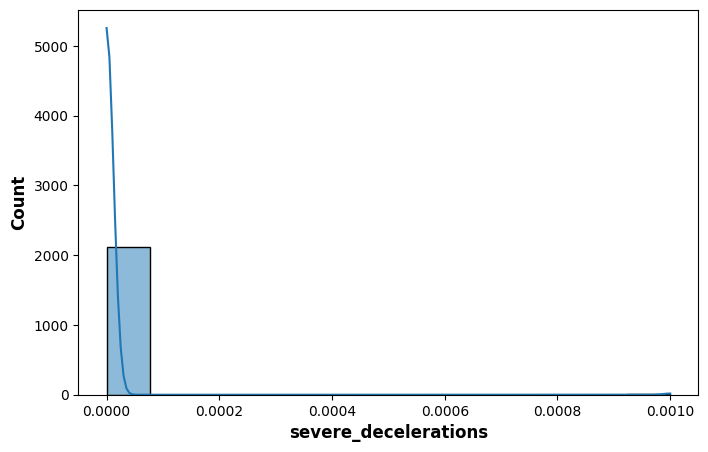

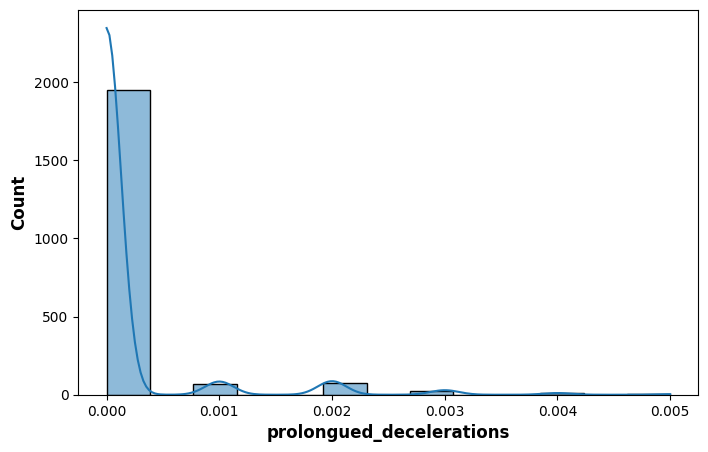

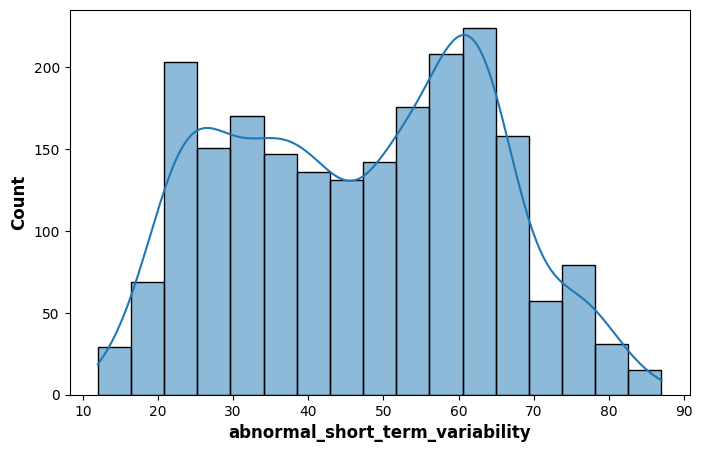

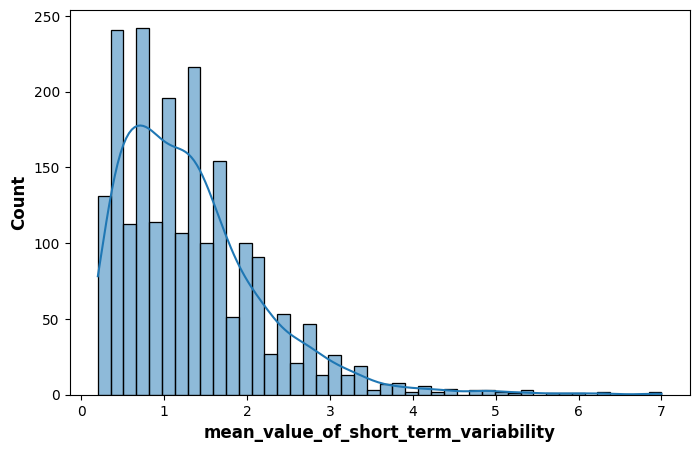

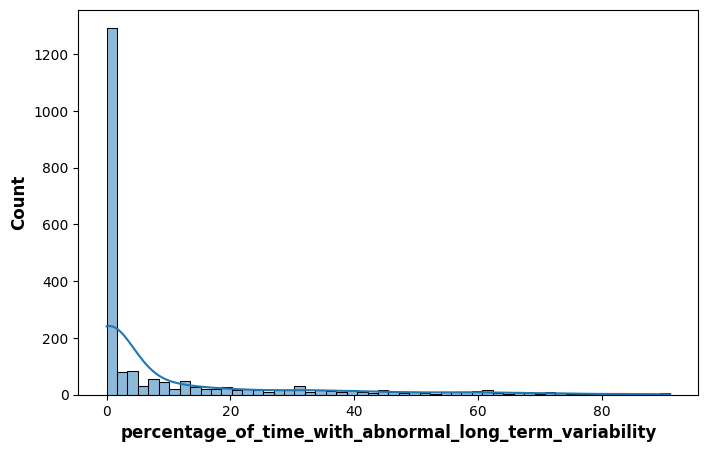

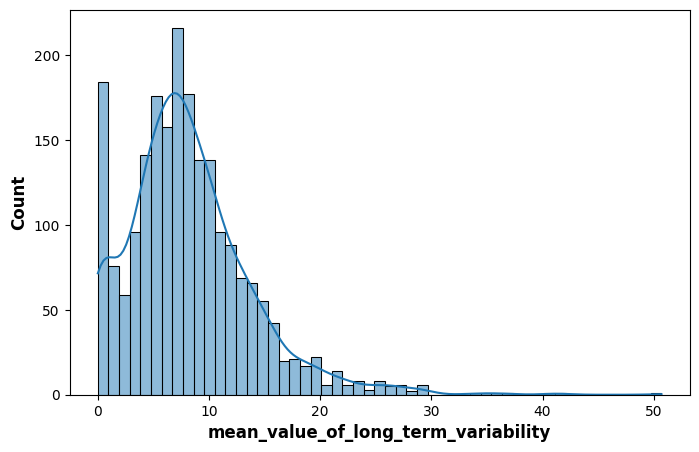

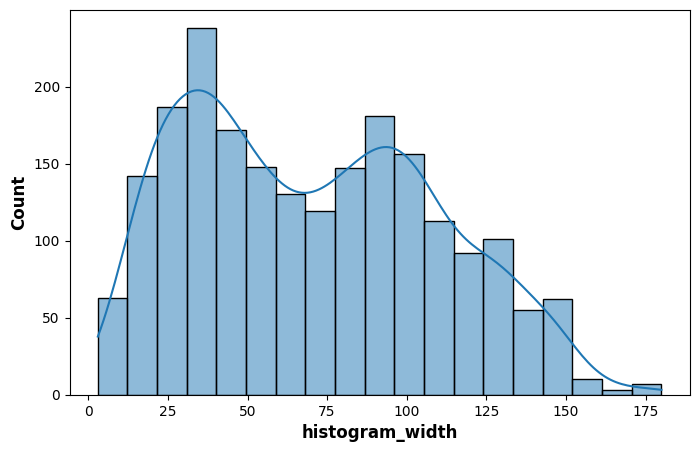

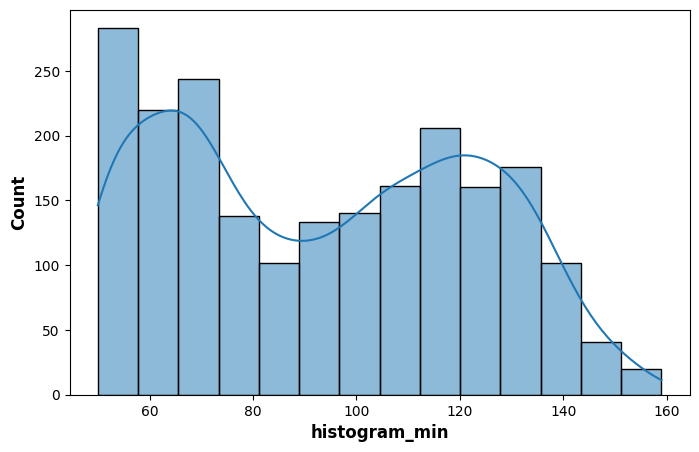

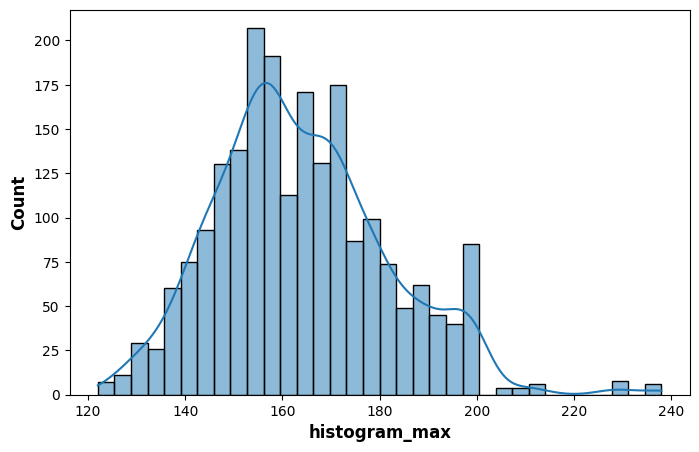

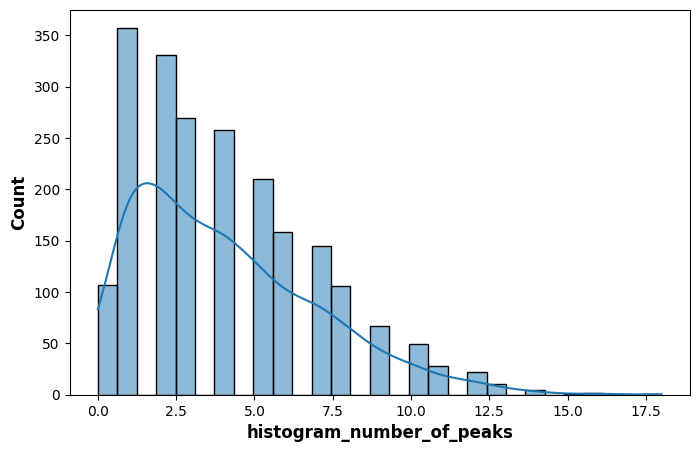

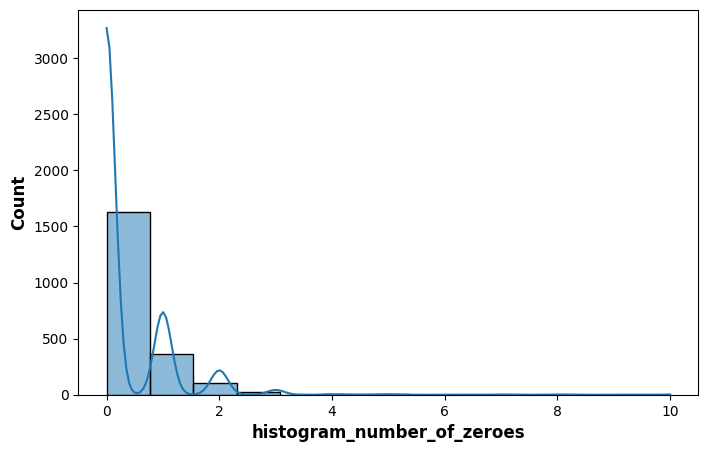

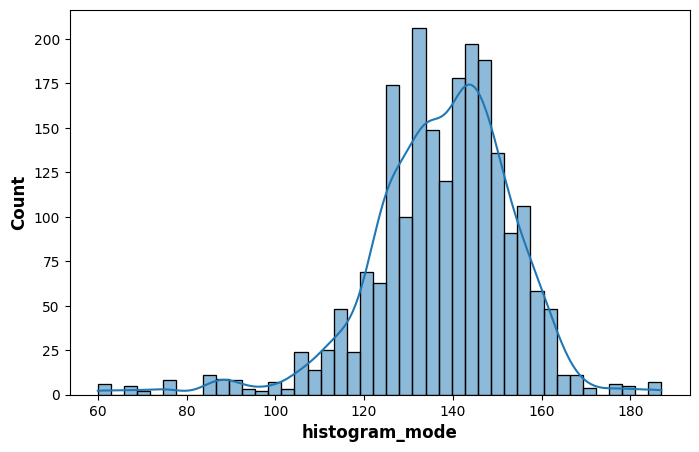

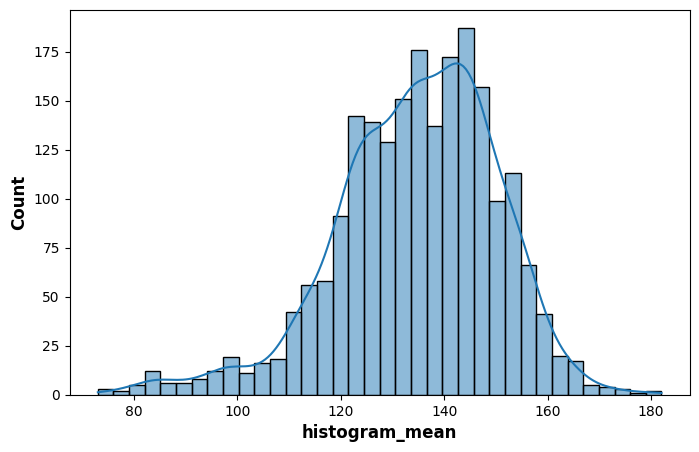

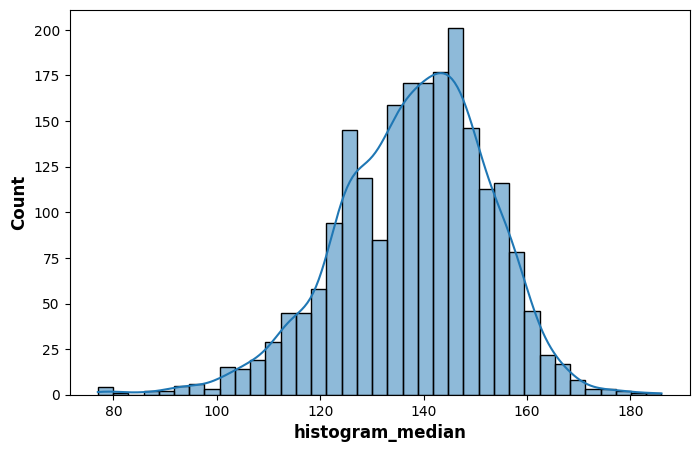

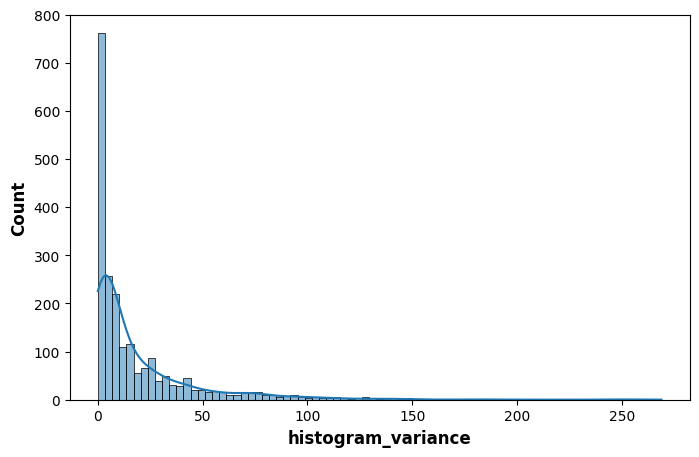

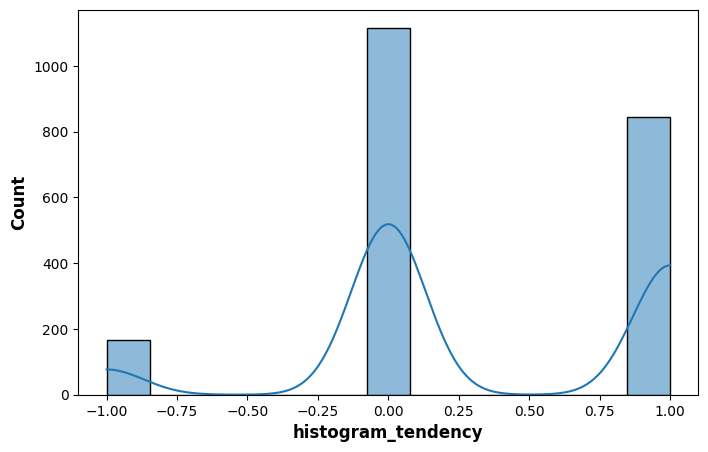

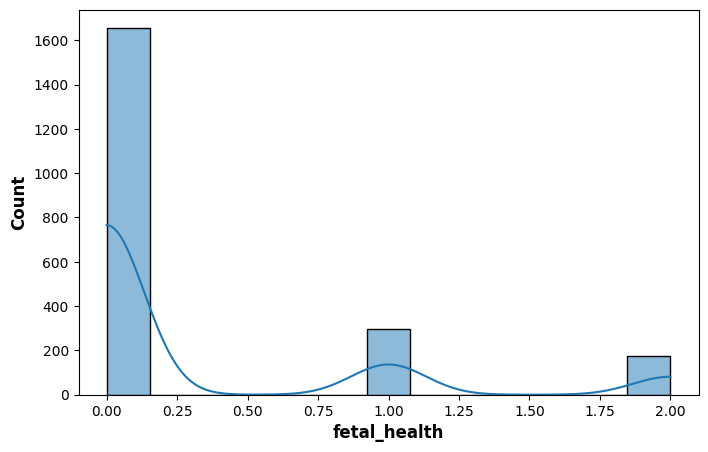

In [34]:
for col in df.columns:
    fig, axs = plt.subplots(figsize=std_figure_size)
    sns.histplot(data=df, x=col, kde=True, ax=axs)
    plt.show()

## Escalamiento y estandarización

In [35]:
df_x=df.drop("fetal_health", axis=1)
X = StandardScaler().fit_transform(df_x)

In [36]:
X = PowerTransformer(standardize=False).fit_transform(X)

In [37]:
X = pd.DataFrame(X, columns=df_x.columns)

# sanity check
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.362525,-1.223745,-0.442358,-1.549666,-1.084941,-2.971243,-0.797828,1.537075,-1.282684,0.517812,...,-0.168986,-1.117686,-2.612376,-0.843194,-0.935455,-0.926672,0.156818,-1.066772,0.652380,1.181086
1,-0.132657,0.526695,-0.442358,0.543686,0.278778,-2.971243,-0.797828,-1.714826,0.665422,-1.004584,...,1.330992,-0.899019,1.574075,0.555158,0.346120,0.224507,0.090342,0.134025,-0.294459,-0.508259
2,-0.030892,-0.047351,-0.442358,1.187402,0.278778,-2.971243,-0.797828,-1.771281,0.665422,-1.004584,...,1.330992,-0.899019,1.574075,0.289382,0.346120,0.224507,0.025079,-0.006240,-0.243296,-0.508259
3,0.070719,-0.047351,-0.442358,1.187402,0.278778,-2.971243,-0.797828,-1.771281,0.857465,-1.004584,...,1.064909,-1.450073,0.318271,1.533561,-0.935455,-0.027468,-0.038927,-0.074736,-0.243296,1.181086
4,-0.132657,0.653974,-0.442358,1.187402,-1.084941,-2.971243,-0.797828,-1.771281,0.857465,-1.004584,...,1.064909,-1.450073,0.318271,1.190944,-0.935455,-0.027468,0.090342,-0.006240,-0.348559,1.181086


# Reducción de componentes

In [38]:
import random
n_parallel_jobs = -1
fixed_random_state = random.seed(42)
reducer = umap.UMAP(n_components=2, n_neighbors=25, n_jobs=n_parallel_jobs, random_state=fixed_random_state)
embedding = reducer.fit_transform(X)

X_reduced = pd.DataFrame(embedding, columns=["comp_1", "comp_2"])

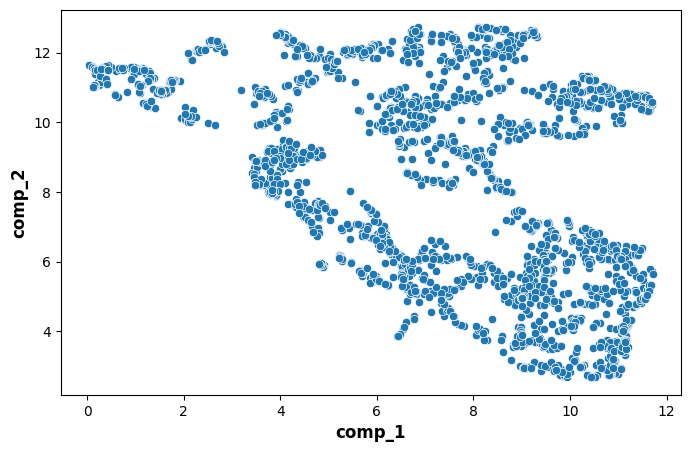

In [39]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(data= X_reduced, x="comp_1", y="comp_2")
plt.show()

## split dataset

In [40]:
from sklearn.model_selection import train_test_split
Y=df["fetal_health"]
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [41]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [42]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1488, 21) (319, 21) (319, 21) (1488,) (319,) (319,)


## model

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [62]:
model = Sequential([
    Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(21,)),  # Capa oculta 1 con 32 neuronas
     Dropout(0.3),
    Dense(64, kernel_regularizer=regularizers.l2(0.01),activation='relu'),
    Dropout(0.3),
    Dense(32, kernel_regularizer=regularizers.l2(0.01),activation='relu'),  # Capa oculta 2 con 32 neuronas
    Dropout(0.3),
    Dense(3,kernel_regularizer=regularizers.l2(0.01), activation='softmax'),                   # Capa de salida con 3 neuronas para 3 clases
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=120,
          validation_data=(X_val, Y_val))

Epoch 1/120
47/47 [==============================] - 1s 9ms/step - loss: 2.0661 - accuracy: 0.7776 - val_loss: 1.6737 - val_accuracy: 0.7962
Epoch 2/120
47/47 [==============================] - 0s 3ms/step - loss: 1.5136 - accuracy: 0.8125 - val_loss: 1.2580 - val_accuracy: 0.8527
Epoch 3/120
47/47 [==============================] - 0s 4ms/step - loss: 1.1702 - accuracy: 0.8461 - val_loss: 1.0179 - val_accuracy: 0.8589
Epoch 4/120
47/47 [==============================] - 0s 3ms/step - loss: 0.9828 - accuracy: 0.8548 - val_loss: 0.8507 - val_accuracy: 0.8683
Epoch 5/120
47/47 [==============================] - 0s 3ms/step - loss: 0.8227 - accuracy: 0.8757 - val_loss: 0.7399 - val_accuracy: 0.8840
Epoch 6/120
47/47 [==============================] - 0s 4ms/step - loss: 0.7300 - accuracy: 0.8817 - val_loss: 0.6704 - val_accuracy: 0.8777
Epoch 7/120
47/47 [==============================] - 0s 4ms/step - loss: 0.6678 - accuracy: 0.8817 - val_loss: 0.6075 - val_accuracy: 0.8840
Epoch 8/120
4

# Métricas de evaluación

In [64]:
# The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element.
model.evaluate(X_test, Y_test)[1]

10/10 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8683


0.8683385848999023

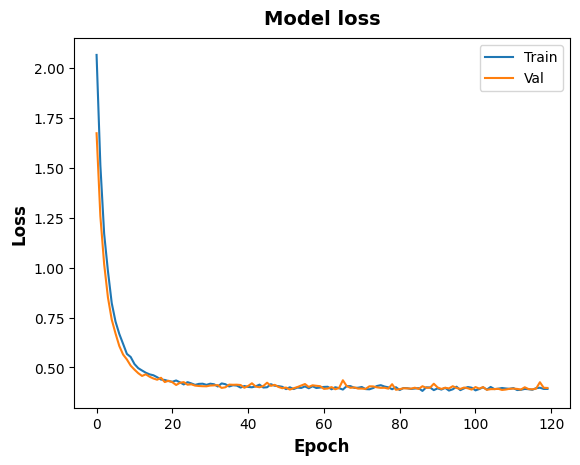

In [65]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


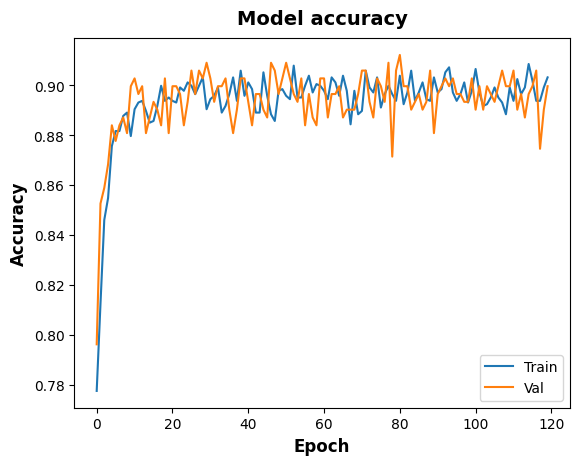

In [66]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

10/10 [==============================] - 0s 2ms/step


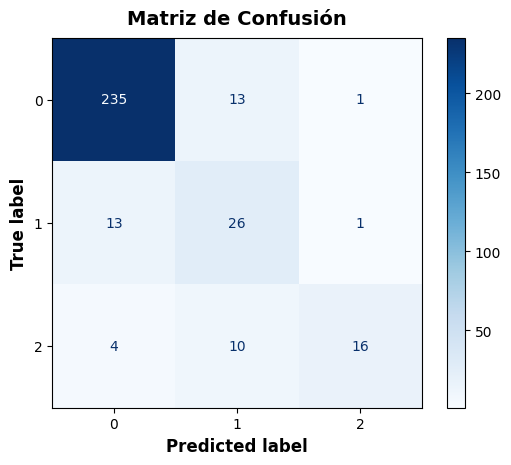

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_true=Y_test
cm = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

In [68]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)

# Imprimir el reporte
print(report)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       249
           1       0.53      0.65      0.58        40
           2       0.89      0.53      0.67        30

    accuracy                           0.87       319
   macro avg       0.78      0.71      0.73       319
weighted avg       0.88      0.87      0.87       319

